# Behavioral Despair in the Talmud

## The Problem

R. Yitzchak is cited In B.T. Bava Metziah 21a as ruling that lost produce is considered "scattered" when it has a dispersal ratio of one *kav* per 4 cubits of area. The import of this categorization is that in such a situation, the owner is assumed to have despaired of ever recovering the produce and keeping such produce is not theft.

Let us call this ruling "R. Yitzchak's axiom."

Based on ths ruling, R. Yirmyah ibid. asks what the normative ruling is for the following cases:

1. 0.5 *kav* dispersed over 2 cubits of area.
2. 2 *kav* dispersed over 8 cubits of area.

The Talmud leaves R. Yirmyah's questions unresolved. 

## A Mathematical Model of Behavioral Despair

In their paper "Behavioral Despair in the Talmud", Feldman et al. show that R. Yirmyah's questions can be resolved based on some reasonable assumptions. The paper is available here: http://www.contravex.com/wp-content/uploads/2016/03/Behavioral-Despair-in-the-Talmud.pdf 

Below, We will follow their reasoning step by step and explore the consequences of R. Yitzchak's axiom.

The Mishnah and Talmud assume that behavioral despair is a *binary* variable. That is, either the owner has despaired or not, with no gray area in between.

We can model the case under consideration as a function $f_i$ that takes two inputs and returns one output. We will explain the reason for the subscript *i* shortly.

The first input into $f_i$ is the *area* over which the items are scattered. 

The second input into $f_i$ is the *amount* of items that are scattered. The output of $f_i$ is 0 if the owner has despaired, and 1 if the owner has not despaired. 

Formally, the signature of $f_i$ is:

$f_i: \mathbb{R^+} \times \mathbb{R^+} \rightarrow\ \{0, 1\},$

where $\mathbb{R^+}$ is the set of all non-negative real numbers.

Since each individual can potentially be associated with a different despair function, we have used the subscript *i*, where *i* ranges over the set of all people.

Feldman et al. call the assumption that the function $f_i$ can only obtain one of two possible outputs the *Assumption of Decision*, and formalize this assumption as:

$\forall i, f_i(a, k) \in \{0, 1\}.$

According to this formulation, R. Yitzchak's axiom can be recast as:

$\forall i,  f_i(4, 1) = 0.$

We can call the ordered pair ((4, 1), 0) *R. Yitzchak's point*.

Likewise, the Talmud's decision to leave R. Yirmyah's questions unresolved can be reformulated as the statement that for all *i*, we do not know the values of either
$f_i(2, 0.5)$ or $f_i(8, 2).$

If we plot area against amount, visualizing R. Yitzchak's point would usually require three axes, since there are two inputs and one output. However, we can make due with only two axes by adopting the convention that if a given input is assocaited with an output of 0, then it is colored red and if a given input is associated with an output of 1, then it is colored green.

Using this convention, we can visualize R. Yitzchak's point as follows:

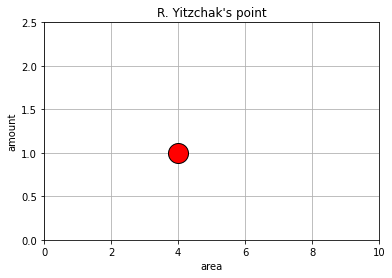

In [232]:
from matplotlib import pyplot as plt

# chart title
plt.title("R. Yitzchak's point")

# axis limits
plt.xlim(0, 10)
plt.ylim(0, 2.5)

# axis labels
plt.xlabel("area")
plt.ylabel("amount")

# use grid lines
plt.grid(True)

# inputs for R. Yitzchak's point
x = [4]
y = [1]

# plot R. Yitzchak's point
plt.plot(x, y, marker="o", markersize=20, markeredgecolor="black", markerfacecolor="red")

plt.show()

## Extending R. Yitzchak's Axiom 

We can now imagine holding one of the inputs in R. Yitzchak's point fixed while varying the other input. 

In particular, if we hold the area fixed and *decrease* the amount, then *a fortiori*, the person will still despair. Conversely, if we hold the amount fixed and *increase* the area, then *a fortiori*, the person will still despair.

Furthermore, if we hold the area fixed and *increase* the amount, then *a fortiori*, the person will *not* despair. Conversely, if hold the amount fixed and we *decrease* the area, then *a fortiori*, the person will *not* despair.

Feldman et al. call this *a fortiori* argument the *Assumption of More-is-Better, Less-is-Worse*, and formalize it using the following two implications:

1. $f_i(a^*, k^*) = 0 \Rightarrow f_i(a, k) = 0$ for all $k \leq k^*$ and $a \geq a^*.$
2. $f_i(a^*, k^*) = 1 \Rightarrow f_i(a, k) = 1$ for all $k \geq k^*$ and $a \leq a^*.$

Using our coloring scheme, we can graph the above two constraints as follows:

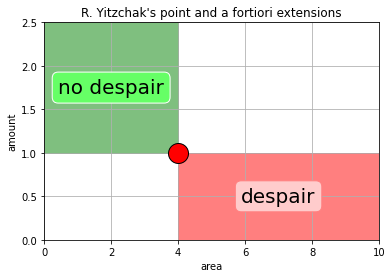

In [233]:
from scipy.optimize import curve_fit
import numpy as np

# chart title
plt.title("R. Yitzchak's point and a fortiori extensions")

# axis limits
plt.xlim(0, 10)
plt.ylim(0, 2.5)

# axis labels
plt.xlabel("area")
plt.ylabel("amount")

# use grid lines
plt.grid(True)

# inputs for R. Yitzchak's point
x1 = [4]
y1 = [1]

# plot R. Yitzchak's point
plt.plot(x1, y1, marker="o", markersize=20, markeredgecolor="black", markerfacecolor="red")

# draw colored boxes
plt.axvspan(4, 10, ymin=0, ymax=0.4, alpha=0.5, color='red')
plt.axvspan(0, 4, ymin=0.4, ymax=1.0, alpha=0.5, color='green')

# label each box
plt.text(7.0, 0.5, "despair", size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.text(2.0, 1.75, "no despair", size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 1, 1),
                   fc=(0.4, 1, 0.4),
                   )
         )

plt.show()

## Defining a Decision Boundary

Now that we have visualized R. Yitzchak's point and its associated a fortiori regions, the question presents itself: what about the two empty areas in the bottom left and top right? Depending on the person, these two areas can be filled in many different ways. 

Those for whom the collection effort is too great will despair of the top right
section but not of the bottom left. Those for whom the quantity is insignificant will despair of the
bottom left section but not the top right. Since we seemingly cannot have a single law for all people, the Talmud's leaves this point unresolved.

However, it turns out that we *can* make general statements that are true of any given despair function. For example, if we call the set of all points for which an individual would despair *D*, then the set of all points for which that same individual would not despair is the *complement* of *D*. We can call this complement set *C*. 

At first, the observation that the sets *D* and *C* are complements of each other seems to imply that we can draw the boundaries between these two sets arbirarily. The following shows one possible way of partitioning these two sets that respects the a fortiori sets we drew previously:

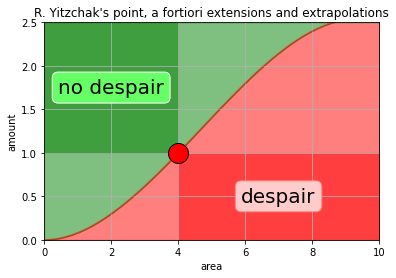

In [234]:
# chart title
plt.title("R. Yitzchak's point, a fortiori extensions and extrapolations")

# axis limits
plt.xlim(0, 10)
plt.ylim(0, 2.5)

# axis labels
plt.xlabel("area")
plt.ylabel("amount")

# use grid lines
plt.grid(True)

# inputs for R. Yitzchak's point
x1 = [4]
y1 = [1]

# plot R. Yitzchak's point
plt.plot(x1, y1, marker="o", markersize=20, markeredgecolor="black", markerfacecolor="red")

# draw colored boxes
plt.axvspan(4, 10, ymin=0, ymax=0.4, alpha=0.5, color='red')
plt.axvspan(0, 4, ymin=0.4, ymax=1.0, alpha=0.5, color='green')

# label each box
plt.text(7.0, 0.5, "despair", size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.text(2.0, 1.75, "no despair", size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 1, 1),
                   fc=(0.4, 1, 0.4),
                   )
         )

# shade areas on each side of a cubic function
x = np.array([ 0, 4, 10])
y = np.array([0, 1, 2.5])

def fun(x, a, b, c):
    return a * (x * x * x) + np.square(b * x) + c

coefficients, _ = curve_fit(fun, x, y)

inputs = np.linspace(x[0],x[-1])
outputs = fun(np.linspace(x[0],x[-1]), *coefficients)

plt.plot(inputs, outputs, color='red', alpha=0.5)

plt.fill_between(inputs, outputs, color='red', alpha=0.5)

plt.fill_between(inputs, outputs, y2=2.5, color='green', alpha=0.5)

plt.show()

## Convex Decision Regions

A set *S* is *convex* if the line segment between any two points in *S* lies in *S*. 

Our next assumption will show that both *D* and *C* must be convex sets, and therefore the boundary between *D* and *C* *must be a straight line.* 

Intuitively, if *D* is convex and the boundary between *D* and C* is not a straight line, then *C* is *concave*, implying that *C* is not convex, since a line between two points in *C* will contain points not in *C*. Therefore, for *D* and *C* to be both be convex, it must be the case that the boundary between the two sets is a straight line.

Feldman et al. prove that sets *D* and *C* must both be convex using the assumption that if two points are in either set, then the *average* of those two points is also in the set. More Formally:

If $(a_1, k_1)$ and $(a_2, k_2)$ belong to *D* (or *C*), then the midpoint between
these two points $((a_1 + a_2)/2, (a_1 + a_2)/2) $ also belongs to *D* (or *C*, respectively). 

It turns out that if a set is closed and midpoint-convex, then it is also a convex set. See here for a proof: https://math.stackexchange.com/a/1371172

Based on the assumption that sets *D* and *C* are both closed and midpoint-convex, we conclude that sets *D* and *C* are both convex sets, and the boundary between them must be a straight line.

Although the boundary between *D* and *C* must be a straight line, we still have not pinned down exaclty *which* straight lines can possibly serve as a boundary between the two sets.

Any boundary line between the two sets must satisfy the following constraints:

1. The line must go through R. Yitzhak’s point with a corresponding output of 0 for despair. 
2. The line must intersect either along the y axis below 1.0 to avoid inteference with the *a fortiori* "no despair" box.
3. The line must intersect either along the x axis below 4.0 to avoid inteference with the *a fortiori* "despair" box.

The following is an example of a decision line that satisifies the above constraints:

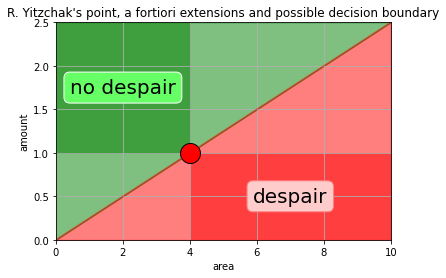

In [235]:
# chart title
plt.title("R. Yitzchak's point, a fortiori extensions and possible decision boundary")

# axis limits
plt.xlim(0, 10)
plt.ylim(0, 2.5)

# axis labels
plt.xlabel("area")
plt.ylabel("amount")

# use grid lines
plt.grid(True)

# inputs for R. Yitzchak's point
x1 = [4]
y1 = [1]

# plot R. Yitzchak's point
plt.plot(x1, y1, marker="o", markersize=20, markeredgecolor="black", markerfacecolor="red")

# draw colored boxes
plt.axvspan(4, 10, ymin=0, ymax=0.4, alpha=0.5, color='red')
plt.axvspan(0, 4, ymin=0.4, ymax=1.0, alpha=0.5, color='green')

# label each box
plt.text(7.0, 0.5, "despair", size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.text(2.0, 1.75, "no despair", size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 1, 1),
                   fc=(0.4, 1, 0.4),
                   )
         )

# shade areas on each side of a linear function
x = np.array([ 0, 4, 10])
y = 0.25*x

plt.plot(x,y, color='red', alpha=0.5)

plt.fill_between(x, y, color='red', alpha=0.5)

plt.fill_between(x, y, y2=2.5, color='green', alpha=0.5)

plt.show()

In addition to R. Yitzchak's point, let us add R. Yirmyah's two points to our diagram:

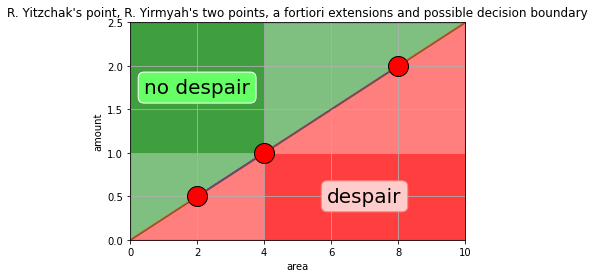

In [236]:
# chart title
plt.title("R. Yitzchak's point, R. Yirmyah's two points, a fortiori extensions and possible decision boundary")

# axis limits
plt.xlim(0, 10)
plt.ylim(0, 2.5)

# axis labels
plt.xlabel("area")
plt.ylabel("amount")

# use grid lines
plt.grid(True)

# inputs for R. Yitzchak's point and R. Yirmyah's two points
x1 = [4, 2, 8]
y1 = [1, 0.5, 2]

# plot R. Yitzchak's point
plt.plot(x1, y1, marker="o", markersize=20, markeredgecolor="black", markerfacecolor="red")

# draw colored boxes
plt.axvspan(4, 10, ymin=0, ymax=0.4, alpha=0.5, color='red')
plt.axvspan(0, 4, ymin=0.4, ymax=1.0, alpha=0.5, color='green')

# label each box
plt.text(7.0, 0.5, "despair", size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.text(2.0, 1.75, "no despair", size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 1, 1),
                   fc=(0.4, 1, 0.4),
                   )
         )

x = np.array([ 0, 4, 10])
y = 0.25*x

plt.plot(x,y, color='red', alpha=0.5)

plt.fill_between(x, y, color='red', alpha=0.5)

plt.fill_between(x, y, y2=2.5, color='green', alpha=0.5)

plt.show()

We have now shown that all possible decision boundaries will be straight lines that pivot aournd R. Yitzhak’s point. However, we do not seem to have made progress towards answering R. Yirmyah's two questions. 

Closer examination reveals that we have in fact made progress towards answering R. Yirmyah's question.

The only decision boundary that can despair on *both* of R. Yirmyah’s points is the straight line that includes the origin (0, 0).

For every other decision boundary, the individual in question despairs at only one of R. Yirmyah’s  points, but not the other. 

In particular, there is no way for a single individual to assert ownership in both of R. Yirmyah’s points while simultaneously despairing at R. Yitzhak’s point.

## Narrowing Down the Possibilities

We now present several arguments to constrain the set of allowed decision boundary lines.

We can partition the set of possible decision boundary lines into three sets:

1. The line which passes directly through the origin.
2. Lines which intersect the y-axis at a point less than zero.
3. Lines which intersect the y-axis between zero and one (not including zero itself).

We will now argue that the only allowable decision boundaries are those from the third set of lines which intersect the y-axis between zero and one (not including zero itself).

To see why lines which intersect the y-axis at a point less than zero are disallowed, consider the following graph:

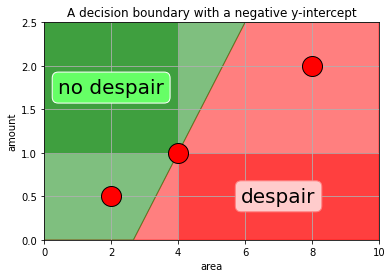

In [237]:
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# chart title
plt.title("A decision boundary with a negative y-intercept")

# axis limits
plt.xlim(0, 10)
plt.ylim(0, 2.5)

# axis labels
plt.xlabel("area")
plt.ylabel("amount")

# use grid lines
plt.grid(True)

# inputs for R. Yitzchak's point and R. Yirmyah's two points
x1 = [4]
y1 = [1]

x2 = [2]
y2 = [0.5]

x3 = [8]
y3 = [2]

# plot R. Yitzchak's point and R. Yirmyah's two points
plt.plot(x1, y1, marker="o", markersize=20, markeredgecolor="black", markerfacecolor="red")
plt.plot(x2, y2, marker="o", markersize=20, markeredgecolor="black", markerfacecolor="red")
plt.plot(x3, y3, marker="o", markersize=20, markeredgecolor="black", markerfacecolor="red")

# draw colored boxes
plt.axvspan(4, 10, ymin=0, ymax=0.4, alpha=0.5, color='red')
plt.axvspan(0, 4, ymin=0.4, ymax=1.0, alpha=0.5, color='green')

# label each box
plt.text(7.0, 0.5, "despair", size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.text(2.0, 1.75, "no despair", size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 1, 1),
                   fc=(0.4, 1, 0.4),
                   )
         )

x = np.array([ 0, 4, 10])
y = 0.25*x 

xs = np.array([ 0, 4, 10])
ys = 0.75*x - 2 

plt.fill_between(xs, ys, color='red', alpha=0.5)

plt.fill_between(xs, ys, y2=2.5, color='green', alpha=0.5)

plt.show()

The above decision boundary is incoherent for the simple reason that its enclosed area includes  points representing a decision to not despair even over *items of no (or minimal) value*. This possbility is barred by the assumption which Feldman et al. call "Despair Over Negligible Fruit." This assumption says that all owners will despair over a *de minimus* amount of fruit regardless of the amount of land area involved. Feldman et al. formalize this assumption as follows:

Let $\epsilon$ represent the smallest denomination of a currency. Then:

$\forall a, f_i(a, \epsilon) = 0$

The only two possibilities left are decision boundaries that pass through the origin and decision boundaries that intersect the y-axis between zero and one (not including zero itself).

A similar argument disallows a decision boundary that passes through the boundary. Let's look at this case again to see the problem:

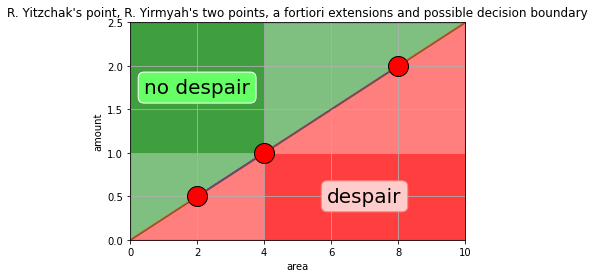

In [238]:
# chart title
plt.title("R. Yitzchak's point, R. Yirmyah's two points, a fortiori extensions and possible decision boundary")

# axis limits
plt.xlim(0, 10)
plt.ylim(0, 2.5)

# axis labels
plt.xlabel("area")
plt.ylabel("amount")

# use grid lines
plt.grid(True)

# inputs for R. Yitzchak's point and R. Yirmyah's two points
x1 = [4, 2, 8]
y1 = [1, 0.5, 2]

# plot R. Yitzchak's point R. Yirmyah's two points
plt.plot(x1, y1, marker="o", markersize=20, markeredgecolor="black", markerfacecolor="red")

# draw colored boxes
plt.axvspan(4, 10, ymin=0, ymax=0.4, alpha=0.5, color='red')
plt.axvspan(0, 4, ymin=0.4, ymax=1.0, alpha=0.5, color='green')

# label each box
plt.text(7.0, 0.5, "despair", size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.text(2.0, 1.75, "no despair", size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 1, 1),
                   fc=(0.4, 1, 0.4),
                   )
         )

x = np.array([ 0, 4, 10])
y = 0.25*x

plt.plot(x,y, color='red', alpha=0.5)

plt.fill_between(x, y, color='red', alpha=0.5)

plt.fill_between(x, y, y2=2.5, color='green', alpha=0.5)

plt.show()

In the above case, notice that the points whose x and y coordinates are arbitrarily close to 0, such as (0.0001, 0.0001) are included in the area corresponding to no despair. This again violates the assumption "Despair Over Negligible Fruit" assumption. The above process of elimination leads us to the conclusion that the only allowed decision boundaries are those which intersect the y-axis between zero and one (not including zero itself). 

A valid decision boundary might look as follows:

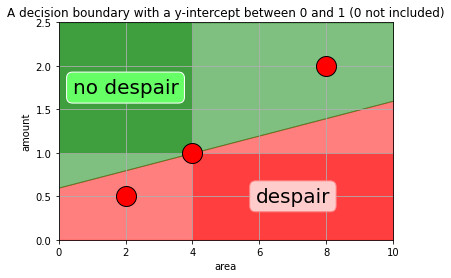

In [239]:
# chart title
plt.title("A decision boundary with a y-intercept between 0 and 1 (0 not included)")

# axis limits
plt.xlim(0, 10)
plt.ylim(0, 2.5)

# axis labels
plt.xlabel("area")
plt.ylabel("amount")

# use grid lines
plt.grid(True)

# inputs for R. Yitzchak's point and R. Yirmyah's two points
x1 = [4]
y1 = [1]

x2 = [2]
y2 = [0.5]

x3 = [8]
y3 = [2]

# plot R. Yitzchak's and R. Yirmyah's point
plt.plot(x1, y1, marker="o", markersize=20, markeredgecolor="black", markerfacecolor="red")
plt.plot(x2, y2, marker="o", markersize=20, markeredgecolor="black", markerfacecolor="red")
plt.plot(x3, y3, marker="o", markersize=20, markeredgecolor="black", markerfacecolor="red")

# draw colored boxes
plt.axvspan(4, 10, ymin=0, ymax=0.4, alpha=0.5, color='red')
plt.axvspan(0, 4, ymin=0.4, ymax=1.0, alpha=0.5, color='green')

# label each box
plt.text(7.0, 0.5, "despair", size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.text(2.0, 1.75, "no despair", size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 1, 1),
                   fc=(0.4, 1, 0.4),
                   )
         )

xs = np.array([ 0, 4, 10])
ys = (0.1 * x) + 0.6

plt.fill_between(xs, ys, color='red', alpha=0.5)

plt.fill_between(xs, ys, y2=2.5, color='green', alpha=0.5)

plt.show()

Crucially, the fact that no decision boundary can pass through the origin implies that we can answer R. Yirmyah's two questions. Any valid decision boundary that intersects the y-axis between 0 and 1 will include the point (2, 0.5) in the "no despair" region and the point (8, 2) in the "no despair" region.

## Conclusion

Although every individual will be associated with a different their decision function $f_i$, their decision making can always be represented by a line that crosses at some point above the origin and intersects R. Yitzhak’s point. Therefore, every individual will despair at R. Yirmiah’s lower point and not despair at his higher point. This result does not depend on the precise value of the *de minimus amount.*